### Objectives
* Revisiting Outliers
* Clustering - DBSCAN

* Outliers - Data not part of general presentation

In [1]:
from sklearn.datasets import make_blobs

In [3]:
X,_ = make_blobs(n_features=2,centers=2,cluster_std=2.5,n_samples=1000)

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'X2')

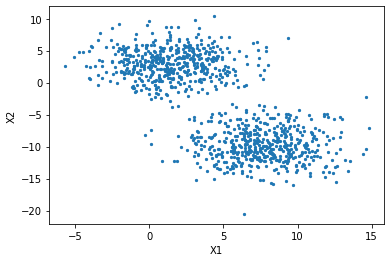

In [7]:
plt.scatter(X[:,0],X[:,1],s=5)
plt.xlabel('X1')
plt.ylabel('X2')

### Important Notes
* Not all data will be part of any cluster
* There will be some data, clusterless
* DBSCAN can identify clusterless data as well

In [8]:
from sklearn.cluster import DBSCAN

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [10]:
ss = StandardScaler()

In [30]:
X_tf = ss.fit_transform(X)

In [31]:
dbscan = DBSCAN(eps=.5,min_samples=10)

In [32]:
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [35]:
dbscan.labels_

array([ 8, -1,  0,  0, -1,  1,  0,  5, -1, -1,  5, -1, -1, -1, -1,  2, -1,
       -1, -1, -1, -1,  1, -1, 12, -1,  0,  3, -1, -1, -1, -1, 16, -1, -1,
       -1, -1, -1, -1,  7, -1,  4,  5,  5, -1,  3, -1,  6, -1, -1, -1, -1,
        4,  2, 11, -1,  0, -1, -1, -1,  1,  5, -1, -1, -1, -1, -1, 11, 14,
        6, -1,  0, -1,  0, -1, -1,  0, -1, -1, 16, -1, -1, -1,  5, -1, -1,
       -1, -1,  0, -1, -1, -1, -1,  5, -1, -1,  0, 16, -1, -1, -1, -1, -1,
       -1,  2, -1,  8,  0, -1, -1, 10,  0, -1, -1, -1, -1, -1, -1, -1,  3,
        0, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, 13, -1, -1, -1, -1, -1,
        0, -1, -1, -1, -1,  7,  1, -1, -1, -1, -1, -1,  0, -1, -1,  0,  0,
        0, -1, -1, -1, -1, -1, -1, 16, -1,  6, 13, -1, -1,  0,  0, -1,  5,
       -1, -1,  2, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,  5, -1,
        0, -1, -1, -1, -1, -1, -1, -1,  8, -1,  0, -1, -1, -1, -1, -1,  0,
       -1, -1, -1,  1, -1, -1,  5, -1,  0, -1,  1, -1, -1,  5, -1, -1,  0,
       -1, -1, -1, -1,  5

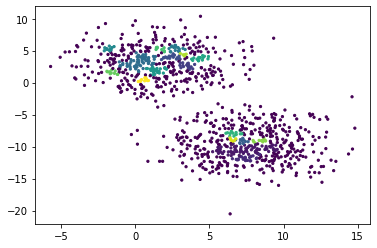

In [36]:
plt.scatter(X[:,0],X[:,1], s=5, c=dbscan.labels_)

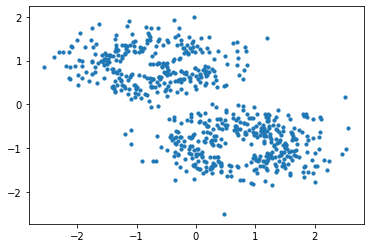

In [37]:
plt.scatter(X_tf[dbscan.labels_ == -1][:,0], X_tf[dbscan.labels_ == -1][:,1],s=10)

In [38]:
centers = [[1,1],[-1,-1],[1,-1]]
X,labels_true = make_blobs(n_samples=750,centers=centers,cluster_std=0.4,random_state=0)

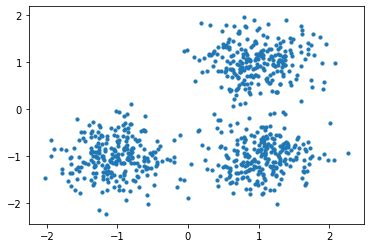

In [39]:
plt.scatter(X[:,0],X[:,1],s=10)

In [40]:
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=.3,min_samples=10).fit(X)

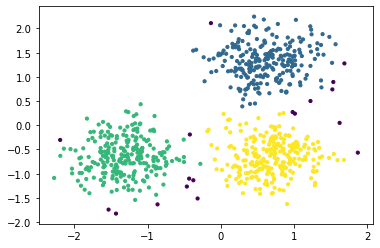

In [41]:
plt.scatter(X[:,0],X[:,1],s=10,c=db.labels_)

 * .eps: The distance which it will consider as neighbour & from Cluster

### On the housing data, find the houses which are outliers

In [42]:
import pandas as pd

In [43]:
house_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt',index_col='Unnamed: 0')

In [44]:
house_data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


### Algorithm
* The algorithm starts with an arbitrary point which has not been visited and its neighborhood information is retrieved from the .eps parameter.
* If this point contains min_samples within .eps neighborhood, cluster formation starts. Otherwise the point is labeled as -1(outlier).
* This point can be later found within the ϵ neighborhood of a different point and, thus can be made a part of the cluster. Concept of density reachable and density connected points are important here.
* If a point is found to be a core point then the points within the ϵ neighborhood is also part of the cluster. So all the points found within ϵ neighborhood are added, along with their own ϵ neighborhood, if they are also core points.
* The above process continues until the density-connected cluster is completely found.
* The process restarts with a new point which can be a part of a new cluster or labeled as noise

In [45]:
house_data_tf = ss.fit_transform(house_data[['Sqft','Price']])

In [55]:
dbscan = DBSCAN(eps=.5,min_samples=10)

In [56]:
dbscan.fit(house_data_tf)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [57]:
sum(dbscan.labels_ ==-1)

26

In [65]:
house_data[dbscan.labels_ == -1]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,Cluster
6,1127.886,11,12,4,2,2,148000,-1
21,2490.600,19,21,5,3,4,140000,-1
25,3664.740,19,19,3,2,3,200000,-1
27,3664.740,19,19,3,2,3,200000,-1
39,3735.900,19,19,3,2,3,200000,-1
49,3735.900,19,19,3,2,3,200000,-1
55,4643.190,1,6,5,4,4,180000,-1
149,4981.200,3,38,3,2,3,225000,-1
166,4091.700,2,15,3,2,4,180000,-1
251,3255.570,4,7,4,2,5,120000,-1


In [63]:
house_data['Cluster'] = dbscan.labels_

In [64]:
house_data[dbscan.labels_==1]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,Cluster
28,3059.880,21,24,4,2,3,145000,1
41,3063.438,21,24,5,2,4,145000,1
87,3255.570,4,7,4,2,4,130000,1
105,3173.736,3,9,3,2,3,150000,1
106,2917.560,8,16,4,2,2,150000,1
118,3202.200,5,6,4,2,2,149999,1
142,3323.172,19,21,5,3,4,140000,1
185,3255.570,4,7,4,2,5,130000,1
245,3173.736,3,9,4,2,3,160000,1
249,2668.500,5,12,4,2,2,138888,1


In [66]:
sum(dbscan.labels_ ==1)

17

In [67]:
sum(dbscan.labels_ ==0)

602

In [68]:
house_data[dbscan.labels_ ==0]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,Cluster
1,1177.698,2,7,2,2,2,62000,0
2,2134.800,5,7,4,2,2,78000,0
3,1138.560,5,7,2,2,1,58000,0
4,1458.780,2,7,3,2,2,45000,0
5,967.776,11,14,3,2,2,45000,0
...,...,...,...,...,...,...,...,...
644,1359.156,7,15,3,2,2,45000,0
645,377.148,4,10,1,1,1,24800,0
646,740.064,13,14,1,1,1,45000,0
647,1707.840,3,14,3,2,2,65000,0


Text(0, 0.5, 'Price')

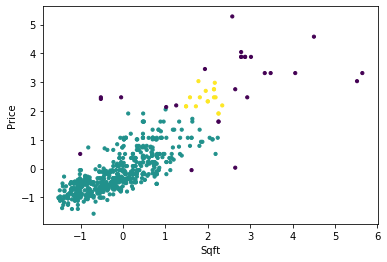

In [70]:
plt.scatter(house_data_tf[:,0],house_data_tf[:,1],s=10,c=dbscan.labels_)
plt.xlabel('Sqft')
plt.ylabel('Price')

# Topic For Assessment
### Nearest Neighbours
* Classification
* Regression

### Preprocessing 
* Scaling-StandardScaler,MinMaxScaler
* Categorical Data- LabelEncoder

### Three clustering topic you have to master
* KMeans
* Aggo
* DBSCAN